In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [6]:
files = [file for file in os.listdir('../range_0_1/limiting_pM_aspergillus/') if 'results' in file]

In [7]:
len(files)

10000

In [8]:
with open('limiting_pM_aspergillus/'+'paramgrid_complex_adaptation.txt', 'rb') as f:
    param_grid = pickle.load(f)

99


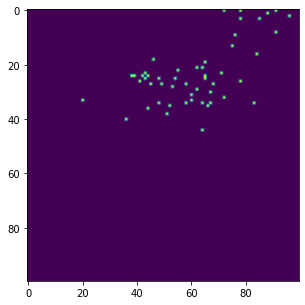

199


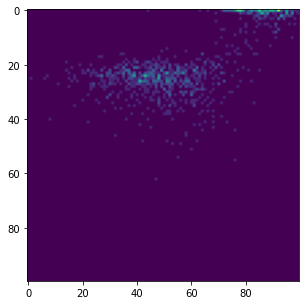

299


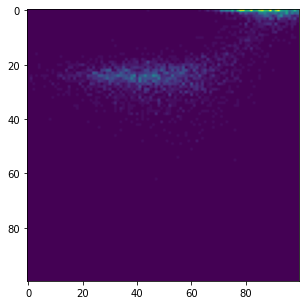

399


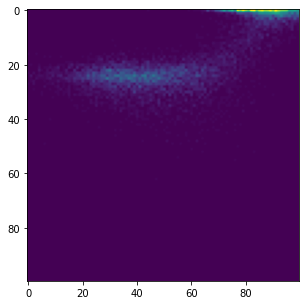

499


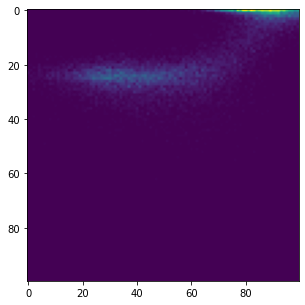

In [9]:
results_all_gen = {}

for ngen in list(range(99,501,100)):
    
    print(ngen)
    
    all_results = np.zeros((100,100))

    for file in files:

        with open('../range_0_1/limiting_pM_aspergillus/'+file,'rb') as f:
            result = pickle.load(f)

        pind = int(file.split('_')[-1].split('.')[0])

        gamma1, gamma2 = param_grid[pind]['gamma1'], param_grid[pind]['gamma2']

        all_results[99-gamma1, gamma2] = result[ngen]
        
    fig, ax = plt.subplots(1,1,figsize = (15,5))
    
    ax.imshow(all_results)
        
    results_all_gen[ngen] = all_results
        
    plt.show()

In [10]:
with open('aspergillus_limiting_pM_matrices_0_1.txt', 'wb') as f:
    pickle.dump(results_all_gen, f)